<a href="https://colab.research.google.com/github/mariaeduardagimenes/NLP/blob/master/NLP_Etapas_RegrLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Etapas NLP**

+  +Regressão Logística

**Pipeline para processamento de texto**

Toda análise de dados passa por um pipeline para extração e análise das informações


**Pipeline Geral**
1. Questão - Qual o problema estou solucionando?
2. Coleta e Processamento dos dados
3. Análise dos dados
4. Resultado
5. Comunicação - apresentação dos resultados

**Pipeline NLP**
1. Coleta e Processamento do texto
    
    1.1. Limpeza dos dados
    
    1.2. Manter apenas palavras relevantes

    1.3 Normalização

2. Exploração dos dados

    2.1 Nuvem de palavras

    2.2 Palavras relevantes

3. Converter texto para vetor

4. Algoritmo de inteligência artificial

5. Métricas do modelo



#**Coletando dados** 

Todo problema de machine learning começa com dados.

*   Podemos coletar dados utilizando APIs e tokens, Web Crawling, Web Scraping.
*   Podemos usar base de dados de texto disponíveis, .csv, . txt, etc.
*   Podemos usar corpora disponíveis no NLTK.





**A base de dados que iremos utilizar foi coletada do Twitter e contém termos referentes a educação e a política do Estado de Minas Gerais. Ano 2017.**

O aprendizado supervisionado precisa de dados rotulados para ensinar o modelo. 

Os dados já estão rotulados, como positivo, negativo ou neutro. Caso não estivessem, precisaríamos utilizar aprendizado não supervisionado para rotular. Porém, podemos utilizar esses dados e treinar um classificador.


**Foi utilizado BoW com Regressão Logística**





In [4]:
# Primeiramente importamos as bibliotecas que serão utilizadas em nossa anáise:

import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
import numpy as np
import re
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import toolz as fp
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Vamos usar a função read_csv() do pandas para ler nossa base de dados**

In [6]:
# O pandas é uma biblioteca de análise de dados gratuita e de código aberto para Python.
# Ajuda a manipular uma grande quantidade de dados de forma muito rápida e eficiente 

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Tweets_Mg.csv')
df.head()

Unnamed: 0                      Created At  ... Unnamed: 23  Unnamed: 24
0           0  Sun Jan 08 01:22:05 +0000 2017  ...         NaN          NaN
1           1  Sun Jan 08 01:49:01 +0000 2017  ...         NaN          NaN
2           2  Sun Jan 08 01:01:46 +0000 2017  ...         NaN          NaN
3           3  Wed Jan 04 21:43:51 +0000 2017  ...         NaN          NaN
4           4  Mon Jan 09 15:08:21 +0000 2017  ...         NaN          NaN

[5 rows x 26 columns]

#**Conhecendo nossos dados**

In [7]:
# A função .head(), tmabém do pandas, irá mostrar por padrão as 5 primeiras linhas do que existe
#dentro de um conjunto de dados dentro de um objeto do pandas.

# O .T após head() pode ser utilizadas Um truque para visualizar 
# melhor os dados, pois ela invertendo as linhas pelas colunas (matrix transposta

df.head().T

0  ...                                                  4
Unnamed: 0                                                                 0  ...                                                  4
Created At                                    Sun Jan 08 01:22:05 +0000 2017  ...                     Mon Jan 09 15:08:21 +0000 2017
Text                       ���⛪ @ Catedral de Santo Antônio - Governador ...  ...  ��� PSOL vai questionar aumento de vereadores ...
Geo Coordinates.latitude                                                 NaN  ...                                                NaN
Geo Coordinates.longitude                                                NaN  ...                                                NaN
User Location                                                         Brasil  ...                                                NaN
Username                                                Leonardo C Schneider  ...                                              Emily
User Screen Name                                               LeoCSchneider  ...                                           Milly777
Retweet Count                                                              0  ...                                                  0
Classificacao                                                         Neutro  ...                                           Negativo
Observação                                                               NaN  ...                                                NaN
Unnamed: 10                                                              NaN  ...                                                NaN
Unnamed: 11                                                              NaN  ...                                                NaN
Unnamed: 12                                                              NaN  ...                                                NaN
Unnamed: 13                                                              NaN  ...                                                NaN
Unnamed: 14                                                              NaN  ...                                                NaN
Unnamed: 15                                                              NaN  ...                                                NaN
Unnamed: 16                                                              NaN  ...                                                NaN
Unnamed: 17                                                              NaN  ...                                                NaN
Unnamed: 18                                                              NaN  ...                                                NaN
Unnamed: 19                                                              NaN  ...                                                NaN
Unnamed: 20                                                              NaN  ...                                                NaN
Unnamed: 21                                                              NaN  ...                                                NaN
Unnamed: 22                                                              NaN  ...                                                NaN
Unnamed: 23                                                              NaN  ...                                                NaN
Unnamed: 24                                                              NaN  ...                                                NaN

[26 rows x 5 columns]

In [8]:
# O atributo shape retorna uma tupla que consiste nas dimensões da Array, 
#mostrando quantas linha e colunas possui nosso dataset.

df.shape

(8199, 26)

Temos 8199 linhas e 26 colunas


**Melhorando a visualização dos dados**

Vamos manter apenas as colunas que queremos.

In [9]:
# Vamos usar a função .rename() para renomear as colunas que queremos, e .loc() para escolhermos quais funções vamos manter


np.random.seed(42)
df = (df
               .rename(columns={"Created At": "data_publicacao",
                                "Text": "tweet",                                
                                "Retweet Count" : "num_retweets",
                                "Username": "usuário",
                                "Classificacao": "sentiment"})
               .loc[:, ["data_publicacao", "tweet", "num_retweets",  "usuário", "sentiment"]])
df["data_publicacao"] = pd.to_datetime(df["data_publicacao"],infer_datetime_format=True)

In [10]:
# Vamos olhar novamente
df.head()

data_publicacao  ... sentiment
0 2017-01-08 01:22:05+00:00  ...    Neutro
1 2017-01-08 01:49:01+00:00  ...    Neutro
2 2017-01-08 01:01:46+00:00  ...    Neutro
3 2017-01-04 21:43:51+00:00  ...    Neutro
4 2017-01-09 15:08:21+00:00  ...  Negativo

[5 rows x 5 columns]

**Vamos atribuir valores entre 0 e 1.**

**0 : negativo**

**1 : positivo**

A classe "Neutro"receberá valores aleatórios entre 0 e 1.

In [11]:
df["sentiment"] = df["sentiment"].replace({"Negativo": 0, "Neutro": np.random.choice([0, 1]), "Positivo": 1})

df.head()

data_publicacao  ... sentiment
0 2017-01-08 01:22:05+00:00  ...         0
1 2017-01-08 01:49:01+00:00  ...         0
2 2017-01-08 01:01:46+00:00  ...         0
3 2017-01-04 21:43:51+00:00  ...         0
4 2017-01-09 15:08:21+00:00  ...         0

[5 rows x 5 columns]

#**Explorando nossos dados**

Análises estatísticas das variáveis numéricas do nosso dataset.

In [12]:
df.describe()

num_retweets    sentiment
count   8199.000000  8199.000000
mean      43.338212     0.402488
std      123.369519     0.490429
min        0.000000     0.000000
25%        0.000000     0.000000
50%        0.000000     0.000000
75%       11.000000     1.000000
max     1940.000000     1.000000

Vamos conferir se contem dados NA no nosso conjunto.

In [13]:
#Para isso usamos .isna().sum() que nos retorna a quantidade de NA por feature

df.isna().sum()

data_publicacao    0
tweet              0
num_retweets       0
usuário            0
sentiment          0
dtype: int64

Vamos visualizar a distribuição das classes da coluna ‘sentiment’


In [14]:
# value_counts() retorna a quantidade de tweets positivos, neutros e negativos
df.sentiment.value_counts()

0    4899
1    3300
Name: sentiment, dtype: int64

Conseguimos observar que não existe o problema de desbalanceamento das classes.

Podemos plotar um gráfico para visualizarmos melhor

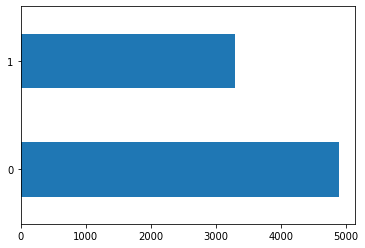

In [15]:
df["sentiment"].value_counts().plot.barh();

**Regex para dar limpeza nos dados e extrair as palavras chaves**

In [16]:
# Podemos usar algumas regex (regular expressions) para limpar os dadose salvá-los de volta no disco para uso futuro

# Criando a função standardize_text que vai receber nossos dados, e a coluna desejada como parâmetro
# Vai remover @, http, mudar @ para at, etc. E também transformar todas as palavras
# para letra minúscula,  o que ajuda na hora de não diferencia Palavra de palavra,
# pelo fato de as duas terem o mesmo sentido, apesar de uma iniciar com letra maiúscula

def standardize_text(df1, text_field):
    df1[text_field] = df1[text_field].str.replace(r"http\S+", "")
    df1[text_field] = df1[text_field].str.replace(r"http", "")
    df1[text_field] = df1[text_field].str.replace(r"@\S+", "")
    df1[text_field] = df1[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df1[text_field] = df1[text_field].str.replace(r"@", "em")
    df1[text_field] = df1[text_field].str.lower()
    return df


# Aplicamos a função criada
df = standardize_text(df, "tweet")

# Podemos usar posteriormente esses dados limpos exportando para .csv
df.to_csv("clean_data.csv")

df.head() 

data_publicacao  ... sentiment
0 2017-01-08 01:22:05+00:00  ...         0
1 2017-01-08 01:49:01+00:00  ...         0
2 2017-01-08 01:01:46+00:00  ...         0
3 2017-01-04 21:43:51+00:00  ...         0
4 2017-01-09 15:08:21+00:00  ...         0

[5 rows x 5 columns]

In [17]:
# Overview

df.groupby("sentiment").count()

data_publicacao  tweet  num_retweets  usuário
sentiment                                               
0                     4899   4899          4899     4899
1                     3300   3300          3300     3300

#**Visualizar as palavras-chave do texto - as mais frequentes**

Com a biblioteca nltk (própria para NLP) podemos verificar as palavras mais frequentes dos tweets. 

Vamos olhar as 20 palavras mais frequentes, que tem mais de 3 caractéres (evitamos algumas stopwords).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


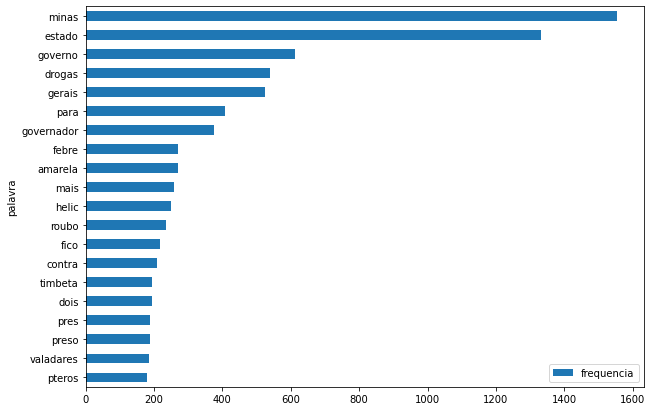

In [18]:
# Aqui já utilizamos tokenização, mas falarei disso mais para frente, na parte de pré-processamento
# Nesse momento é só para visualizar as palavras mais comuns
import nltk
nltk.download('punkt')

tweet_words = nltk.tokenize.word_tokenize(df["tweet"].drop_duplicates().str.lower().str.cat(sep=" ")) # separa em palavras
word_dist = fp.pipe(fp.keyfilter(lambda x: len(x) > 3, nltk.FreqDist(tweet_words)), # apenas palavras com mais de 3 caracteres
                    nltk.probability.FreqDist)

fig, ax = plt.subplots(figsize=(10, 7))

(pd.DataFrame(word_dist.most_common(20)[::-1],
              columns=['palavra', 'frequencia'])
    .plot.barh(x="palavra", y="frequencia", ax=ax));


**Vamos entender mais nossos dados.**

**Como a quantidade de tweets varia por dia?**

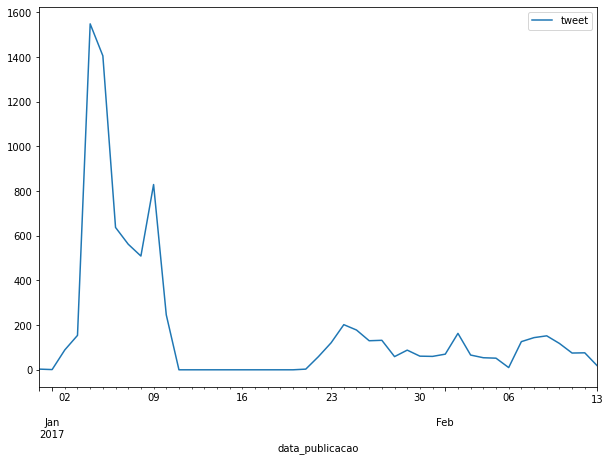

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
(df
     .groupby(pd.Grouper(key="data_publicacao", freq="D"))
     .count()
     .sort_values(by="data_publicacao")[["tweet"]]
     .plot(ax=ax))

**Quais são os usuários que mais publicaram tweets, e quantos tweets publicaram?**


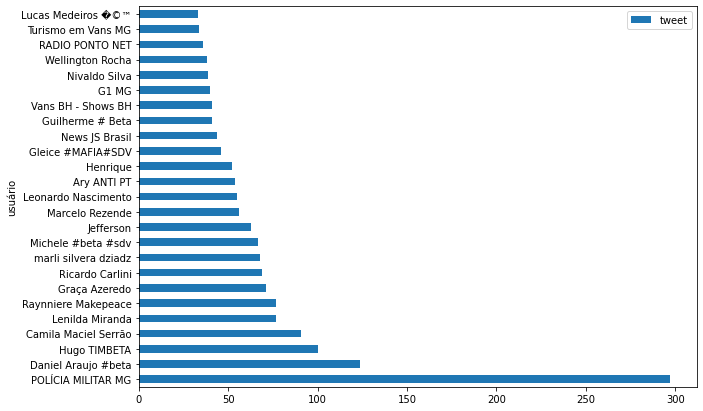

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
(df
     .groupby("usuário")
     .agg({"tweet": "count"})
     .sort_values(by="tweet", ascending=False)
     .head(25).plot.barh(ax=ax));

1. Entre os dias 3 e 9 de janeiro de 2017 houve uma movimentação bem oscilante de quantidade de tweets.

2. O usuário que mais publicou tweets foi polícia militar MG

3. As palavras mais citadas envolvem minas/estado - o que não nos traz tanta informação pois já sabemos que o dataset é de Minas Gerais

4. Traz palavras como drogas, governador, helic, roubo, preso - que nos remete a alguma situação.
Febre e amarela também.
    
5. Se compararmos com as informações da mídia. Unirmos as datas de mais tweets e usuário que mais twittou, podemos ter alguns insights.

**Histograma do número de tweets e retweets por usuário**

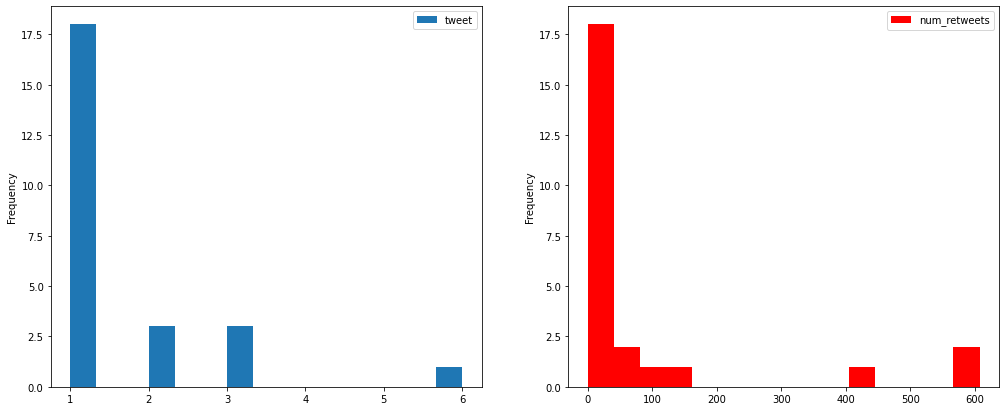

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
(df
     .groupby("usuário")
     .agg({"tweet": "count"})
     .head(25).plot.hist(ax=ax[0], bins=15))
(df
     .groupby("usuário")
     .agg({"num_retweets": "sum"})
     .head(25).plot.hist(ax=ax[1], bins=15, color="r"));

A maioria dos usuários possui de 1 a 3 tweets. 

Não usaremos os retweets no nosso modelo, só agora para visualização.



**ECDF da quantidade de tweets e retweets**

Em estatística, uma função de distribuição empírica é a função de distribuição associada à medida empírica de uma amostra. 

Esta função de distribuição cumulativa é uma função escalonada que aumenta 1 / n em cada um dos n pontos de dados. Seu valor em qualquer valor especificado da variável medida é a fração de observações da variável medida que são menores ou iguais ao valor especificado.

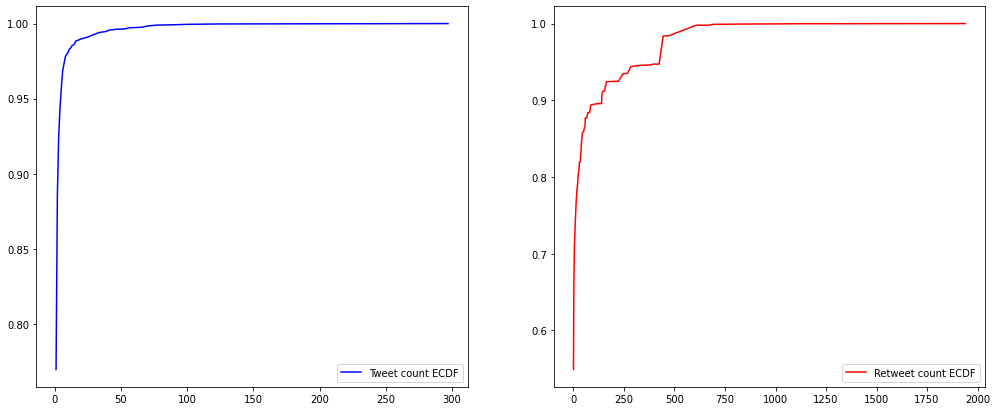

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF


from statsmodels.distributions.empirical_distribution import ECDF
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
tweet_count = (df
                .groupby("usuário")
                .agg({"tweet": "count"})["tweet"].sort_values().values)

retweet_count = (df["num_retweets"].sort_values().values)

tweet_count_ecdf, retweet_count_ecdf = (map(ECDF, [tweet_count, retweet_count]))
ax[0].plot(tweet_count, tweet_count_ecdf(tweet_count), color="b")
ax[1].plot(retweet_count, retweet_count_ecdf(retweet_count), color="r")
ax[0].legend(labels=["Tweet count ECDF"], loc=4)
ax[0].get_legend().legendHandles[0].set_color("b")
ax[1].legend(labels=["Retweet count ECDF"], loc=4)
ax[1].get_legend().legendHandles[0].set_color("r");

A ECDF de tweets nos dá bem mais informações sobre os nossos dados do que um histograma. 

De primeira já conseguimos observar que praticamente 95% de toda a base de usuários possui menos de 10 tweets e que há outliers de usuários com algo próximo a 300 tweets.

#**Limpando e Processando dados**

"Seu modelo será tão bom quanto seus dados"

Fizemos algumas limpezas para podermos visualizar melhor os dados.

Uma boa regra é examinar os dados primeiro e depois limpá-los. 

Um conjunto de dados limpo permitirá que um modelo aprenda recursos significativos e não se ajuste demais a ruídos irrelevantes.

Checklist:

1. Remova todos os caracteres irrelevantes, como caracteres não alfanuméricos

2. Tokenize seu texto, separando-o em palavras individuais

3. Remova palavras que não sejam relevantes, como “@” menções no Twitter ou urls

4. Converta todos os caracteres em minúsculas, a fim de tratar palavras como “olá”, “Olá” e “OLÁ” da mesma forma

5. Considere combinar palavras com erros ortográficos ou com ortografia alternada em uma única representação (por exemplo, "cool" / "kewl" / "cooool")

6. Considere a lematização (reduza palavras como "sou", "são" e "é" a uma forma comum, como "ser")

Depois de seguir essas etapas e verificar se há erros adicionais, podemos começar a usar os dados limpos e rotulados para treinar modelos!

Vamos fazer mais alguma limpeza e preparar os dados.



**Checando quantidade de tweets.**

In [23]:
df.tweet.count()

8199

8199 tweets

**Eliminando valores duplicados com a função drop_duplicates()**

**e checando novamente**


In [24]:
df.drop_duplicates(['tweet'], inplace = True)

df.tweet.count()

3742

Agora temos 3742 tweets. 

Tínhamos muitos valores duplicados.

É importante removê-los pois eles podem alterar o resultado final da nossa análise.

In [25]:
df.count()

data_publicacao    3742
tweet              3742
num_retweets       3742
usuário            3742
sentiment          3742
dtype: int64

**Depois de usar regex, eliminar duplicatas e melhorar a visualização do dataframe, vamos tokenizar os tweets**

Tokens são termos individuais, como palavras.
Um token é uma sequência de caracteres entre dois espaços, ou entre um espaço e sinais de pontuação. 

In [26]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["tweet"].apply(tokenizer.tokenize)
df.head()

data_publicacao  ...                                             tokens
0 2017-01-08 01:22:05+00:00  ...  [em, catedral, de, santo, ant, nio, governador...
1 2017-01-08 01:49:01+00:00  ...         [em, governador, valadares, minas, gerais]
2 2017-01-08 01:01:46+00:00  ...         [em, governador, valadares, minas, gerais]
3 2017-01-04 21:43:51+00:00  ...                                                 []
4 2017-01-09 15:08:21+00:00  ...  [psol, vai, questionar, aumento, de, vereadore...

[5 rows x 6 columns]

**Vamos inspecionar mais um pouco nosso dataset**

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s palavras no total, com um vocabulário de tamanho %s" % (len(all_words), len(VOCAB)))
print("O comprimento máximo de frase é %s" % max(sentence_lengths))

58054 palavras no total, com um vocabulário de tamanho 6136
O comprimento máximo de frase é 35


**Vamos visualizar no gráfico**

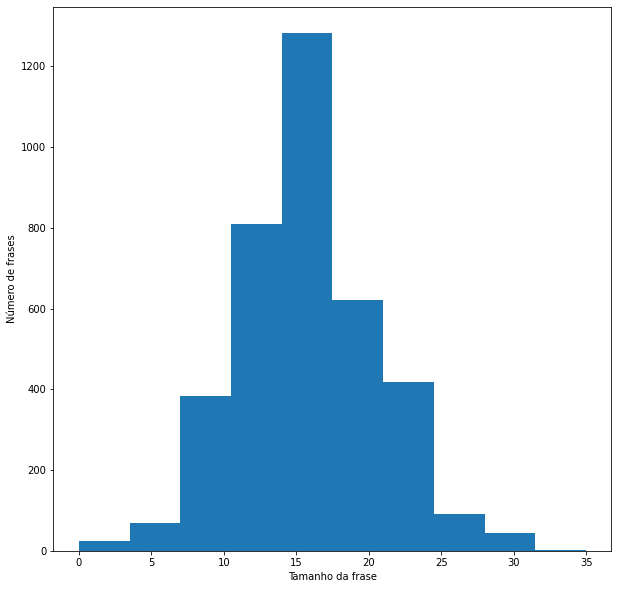

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tamanho da frase')
plt.ylabel('Número de frases')
plt.hist(sentence_lengths)
plt.show()

**Part Of Speech Tagger**

POS Tagger 

Técnica que lê um texto de alguma língua e assinala, para cada palavra, a classe tramatial a qual ela pertence. Um dos POS TAGGERS mais conhecidos é o criado pela universidade de stanford.

É interessante para analisar contextos em que a palavra está inserida. Ainda não funciona muito bem para o português.


In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')

tagged = df["tokens"].apply(nltk.pos_tag)
#criar tags para cada token
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0       [(em, JJ), (catedral, JJ), (de, FW), (santo, F...
1       [(em, JJ), (governador, NN), (valadares, NNS),...
2       [(em, JJ), (governador, NN), (valadares, NNS),...
3                                                      []
4       [(psol, NN), (vai, NN), (questionar, NN), (aum...
                              ...                        
8176    [(trio, NN), (preso, NN), (suspeito, NN), (de,...
8186    [(trio, NN), (preso, NN), (suspeito, NN), (de,...
8191    [(trio, NN), (preso, NN), (suspeito, NN), (de,...
8197    [(trio, NN), (preso, NN), (suspeito, NN), (de,...
8198    [(trio, NN), (suspeito, NN), (de, IN), (roubo,...
Name: tokens, Length: 3742, dtype: object

**Nuvem de Palavras**

Outra forma de visualizar as palavras mais relevantes é fazendo uma nuvem de palavras.

Possui um aspecto mais visual e interativo, mas não traz, necessariamente, tantas informações.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


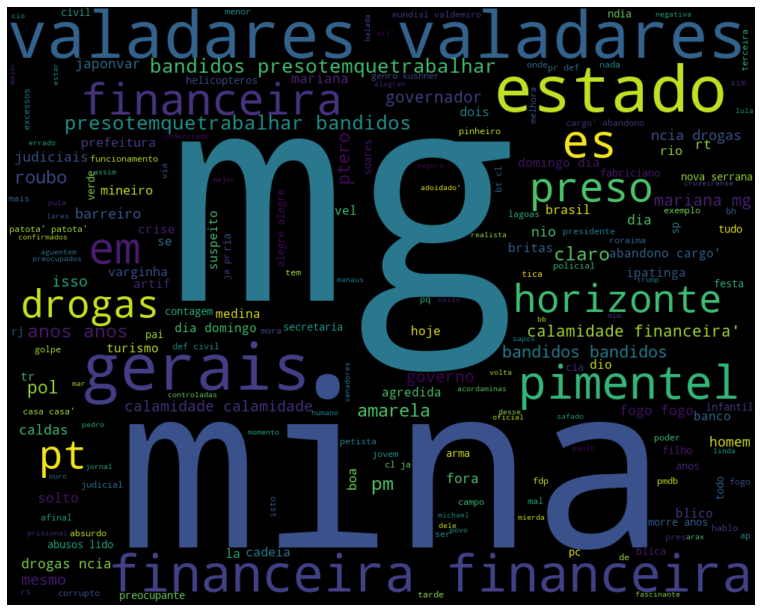

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
nltk

stopwordsPOR = nltk.corpus.stopwords.words('portuguese')

stopwordsPOR

words1 = []
for i in df.tweet:
    for p in i.lower().split():
        if p not in stopwordsPOR and p not in all_words:
         
            words1.append(p)
            
#converter lista para string e gerar
unique_string=(" ").join(words1)

wordcloud = WordCloud(width=1000, height=800, margin=0).generate(unique_string)
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.margins(x=0, y=0)



#**APRENDIZADO DE MÁQUINA**

Nossos dados estão limpos e preparados. Agora vamos para a parte de Machine Learning.



**Embedding**

**Bag of Words Count**

Uma maneira natural de representar texto para computadores é codificar cada caractere individualmente, o que parece bastante inadequado para representar e compreender a linguagem. 

Nosso objetivo é primeiro criar um embedding útil para cada tweet em nosso conjunto de dados e, em seguida, usar esses embeddings para prever com precisão a categoria relevante.

A abordagem mais simples com a qual podemos começar é usar um modelo de Bag of Words e aplicar uma regressão logística no em cima dele. Um BoW apenas associa um índice a cada palavra em nosso vocabulário e incorpora cada frase como uma lista de 0s, com um 1 em cada índice correspondendo a uma palavra presente na frase.

In [31]:
from sklearn.model_selection import train_test_split #scikitlearn é uma biblioteca muito importante para ML
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer() #transforma um texto em um vetor BoW semelahntes a um corpus gensim

    emb = count_vectorizer.fit_transform(data) # para a classe CountVectorize(), fit_transform criará dicionario de bagofwords e vetores para cada documento usando os dados de treinamento.

    return emb, count_vectorizer

list_corpus = df["tweet"].tolist()
list_labels = df["sentiment"].tolist() #a coluna sentiment é nossa label, pela qual o modelo vai aprender, extraindo padrões

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
# a função train_test_split do scikit learn é usada para dividir o dataframe em dados de treinamento e de teste. esse metodo vai dividir os features tweet (textos escritos) e sentiment (nossa label)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test) #depois de chamar fit_transform nos dados de treinamento , chamaremos transform nos dados de teste para criar um vetor bagofwords usando o mesmo dicionario

1. Nesse caso escolhemos um teste de tamanho 20%. random_state é definido para que tenhamos um resultado repetível, 
ele opera de forma semelhante a set.seed() e garante que tenhamos os mesmos resultados ao executar o código novamente
a funcao fara com que 20% das linhas sejam marcadas como dados de teste, e serão removidas dos dados de treinamento
os dados de teste sao usados posteriormente para ver o que o modelo aprendeu

2. Os dados resultantes de train_test_split sao dados de treinamento, como X_train, e labels de treinamento (y_train), dados de teste como X_test, e labels de teste (y_test)

3. Os vetores de treinamento e teste precisam usar um conjunto consistente de palavras para que o modelo treinado possa entender a entrada do teste

4. Se nao tivermos muitos dados pode haver um problema com as palavras no conjunto de teste que nao aparecem nos dados de treinamento - isso gerara um erro e vc precisará adicionar mais dados de treinamento ou remover palavras desconhecidas do conjunto de dados de teste

In [32]:
#Cada palavra da nossa base se tornou uma coluna
type(X_train_counts)

scipy.sparse.csr.csr_matrix

Retorna uma matriz esparsa, contendo vários zeros. 

In [33]:
# Visualizando o número de linhas e colunas da matriz
X_train_counts.shape 


(2993, 5457)

**Visualizando os embeddings**

Agora que criamos embeddings, vamos visualizá-los e ver se podemos identificar alguma estrutura. 

Em um mundo perfeito, nossos embeddings seriam tão distintos que duas classes estariam perfeitamente separadas. Visto que visualizar dados em tantas dimensões é difícil, vamos projetá-los para 2.

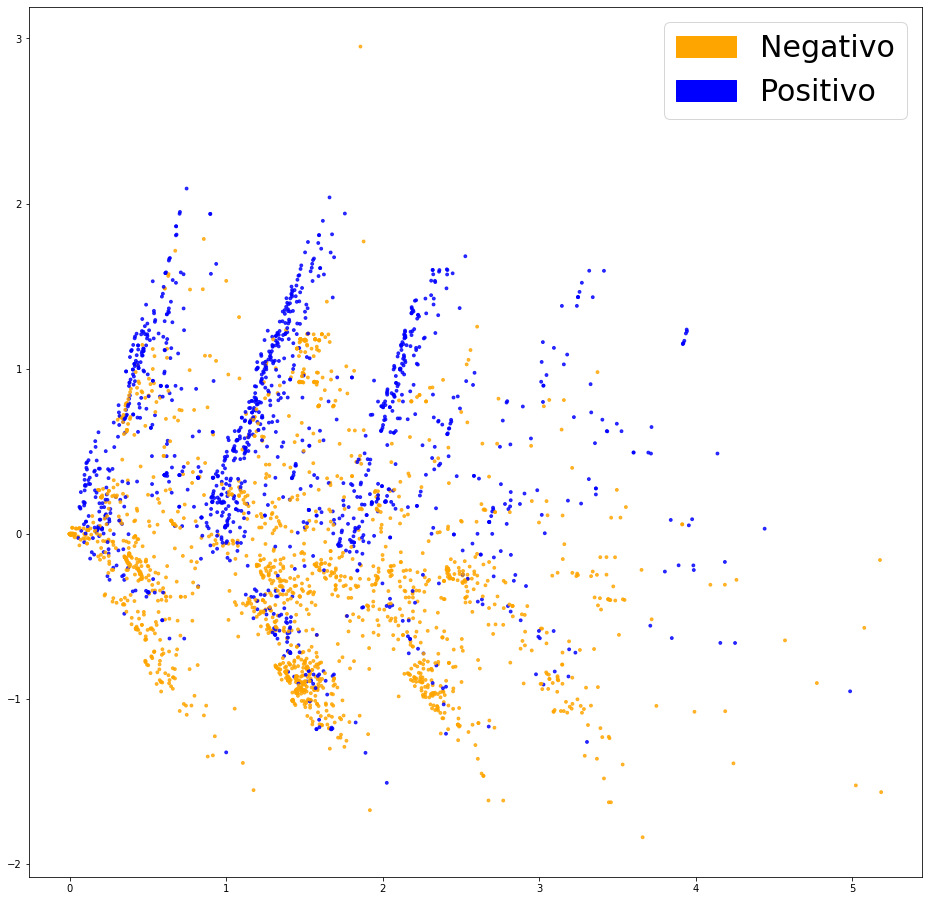

In [34]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Negativo')
            green_patch = mpatches.Patch(color='blue', label='Positivo')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)

plt.savefig('teste.png', format='png')
plt.show()

Podemos perceber algum nível de separação nos embeddings. Mas podemos ver se conseguimos ajustar um modelo útil neles.

**Ajustando um classificador**

Começar com uma regressão logística é uma boa ideia. É simples, geralmente dá conta do recado e é fácil de interpretar.

In [35]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

**Avaliando**

Vamos começar examinando algumas métricas para ver se nosso classificador teve um bom desempenho.

**1) Acurácia**

Indica percentual de acertos que o modelo teve

**2) Precision (precisão)**

precision = true positive / (true positive + false positive)
Significa o número de vezes que uma classe foi predita corretamente dividida pelo número de vezes que a classe foi predita.


**3) Recall (revocação)**

 recall = true positive / (true positive + false negative)
Isso significa o número de vezes que uma classe foi predita corretamente (TP) dividido pelo número de vezes que a classe aparece no dado de teste (FN).


**4) F1-score**

f1-score = 2*((precision * recall) / (precision + recall)
Essa medida é a média harmônica entre precisão e revocação. Com essa informação, podemos dizer a performance do classificador com um indicador apenas.
Como essa medida é uma média, ela dá uma visão mais exata da eficiência do classificador do que apenas a precisão ou a revocação.

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.965, precision = 0.965, recall = 0.965, f1 = 0.965


accuracy = 0.965, precision = 0.965, recall = 0.965, f1 = 0.965

As métricas estão boas.


**Inspecionando**

Uma métrica é uma coisa, mas para tomar uma decisão acionável, precisamos realmente inspecionar os tipos de erros que nosso classificador está cometendo. 

Vamos começar examinando a matriz de confusão.



In [37]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz Confusão',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('Label REAL', fontsize=30)
    plt.xlabel('Label PREVISTA', fontsize=30)

    return plt

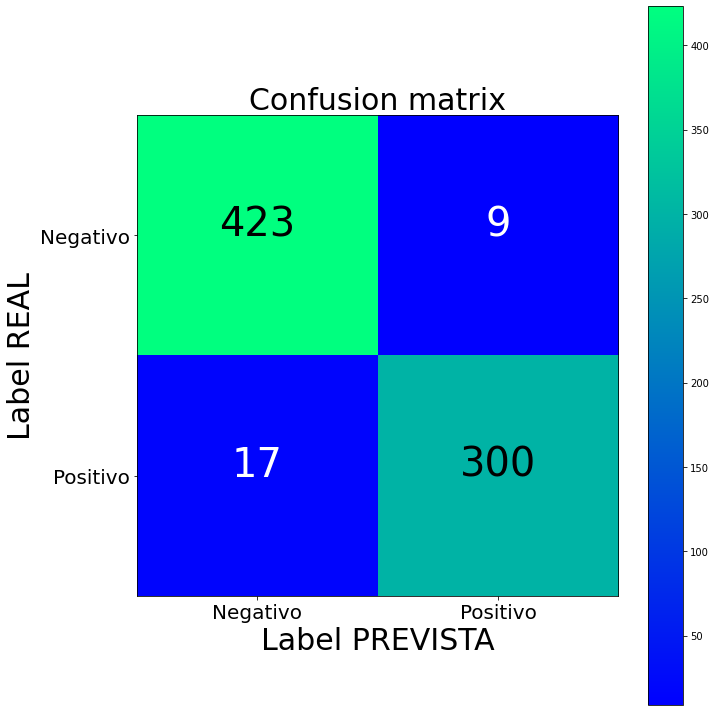

[[423   9]
 [ 17 300]]


In [38]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Negativo','Positivo'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

Nosso classificador cria mais falsos negativos do que falsos positivos (proporcionalmente). Dependendo do caso de uso, isso parece desejável (um falso positivo é um custo bastante alto para a aplicação da lei, por exemplo)

**Mais inspeção**

Vejamos os recursos (features) que nosso classificador está usando para tomar decisões.

In [39]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

 Features mais importantes e pelos quais nosso classificador toma decisão

In [40]:
importance

{0: {'bottom': [(-1.1636379513487989, 'valadares'),
   (-1.2441191421304636, 'pagar'),
   (-1.2449078144619128, '14'),
   (-1.3004387893301974, 'alerta'),
   (-1.3638985421432888, 'investiga'),
   (-1.3948316221202752, 'federal'),
   (-1.4426257508697242, 'casos'),
   (-1.649498936787019, 'helic'),
   (-2.5089691821433244, 'estado'),
   (-2.5430040982757807, 'governador')],
  'tops': [(1.8294302162749803, 'entrega'),
   (1.8955271538532061, 'refor'),
   (1.9237729450571643, 'policiamento'),
   (1.9260381207320576, 'nota'),
   (1.9384331528032133, 'recebe'),
   (2.1752257746282817, 'escola'),
   (2.6204782643817905, 'viaturas'),
   (2.7631711533655796, 'melhor'),
   (2.8002727997935533, 'roubo'),
   (3.3828089517519095, 'drogas')]}}

 Nosso classificador detecta corretamente alguns padrões. Mas será que podemos melhorar? 

 Apareceu um número 14 que parece ser caso de overfitting.

**TFIDF Bag of Words**

Vamos tentar uma abordagem um pouco mais sutil.

No topo do nosso modelo de BoW usamos um TF-IDF (Term Frequency, Inverse Document Frequency), o que significa pesar as palavras pela frequência com que elas são em nosso conjunto de dados, descontando palavras que são muito frequentes, pois apenas aumentam o ruído.

In [41]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



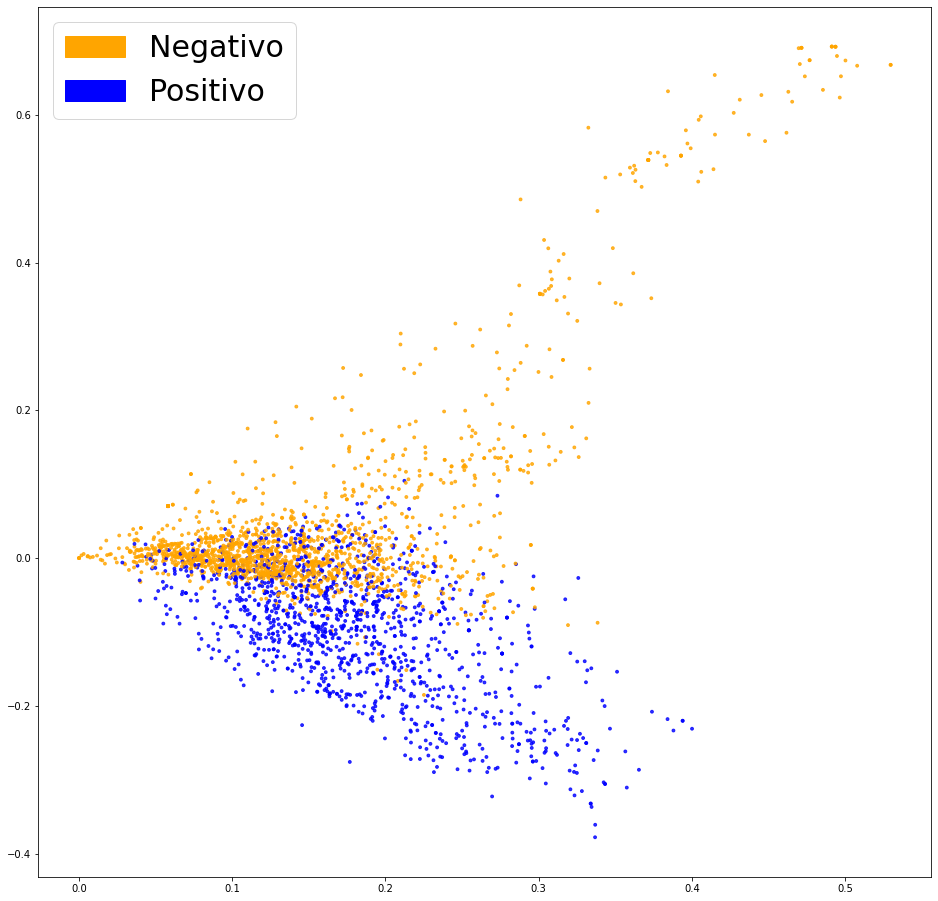

In [42]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

Esses embeddings parecem muito mais separados, vamos ver se isso leva a um melhor desempenho.

In [43]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [44]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.967, precision = 0.967, recall = 0.967, f1 = 0.967


Os resultados são um pouco melhores, vamos ver se eles se traduzem em uma diferença real em nosso caso de uso.

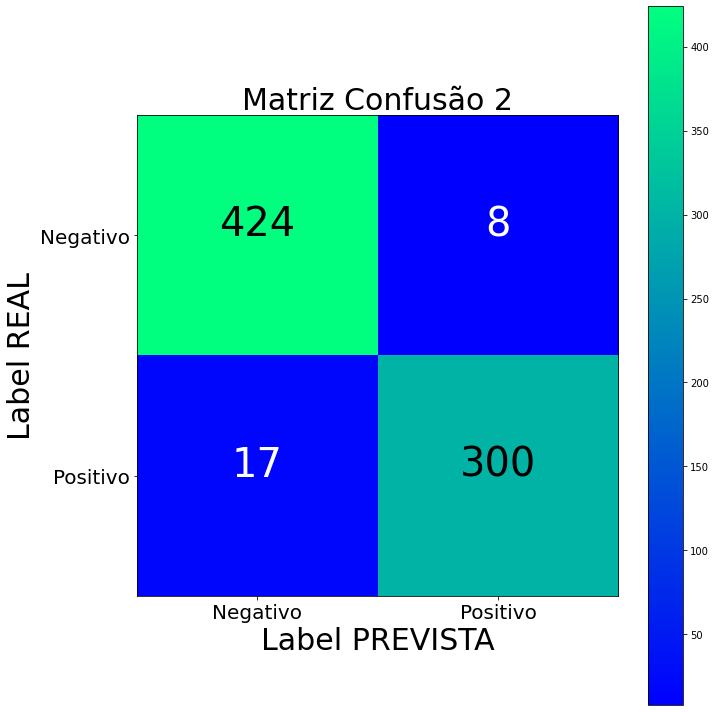

TFIDF confusion matrix
[[424   8]
 [ 17 300]]
BoW confusion matrix
[[423   9]
 [ 17 300]]


In [45]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Negativo','Positivo'], normalize=False, title='Matriz Confusão 2')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

O falso positivo diminuiu. O modelo melhorou.

**Olhando para coeficientes importantes para regressão linear**

In [46]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

importance_tfidf

{0: {'bottom': [(-2.031685256376546, 'temer'),
   (-2.0709883309701445, 'calamidade'),
   (-2.1136176036469396, 'investiga'),
   (-2.1330439017140774, 'casos'),
   (-2.3104871512854217, 'pteros'),
   (-2.3453757969457216, 'alerta'),
   (-3.3894883180872117, 'helic'),
   (-4.024095438649998, 'valadares'),
   (-6.263132848069166, 'governador'),
   (-10.85976065580211, 'estado')],
  'tops': [(3.315652907468516, 'entrega'),
   (3.617600022752352, 'amarela'),
   (3.617600022752352, 'febre'),
   (3.7667952846643797, 'refor'),
   (4.042630111856732, 'melhor'),
   (4.0912615811524295, 'viaturas'),
   (4.30672611469265, 'escola'),
   (4.392555517137608, 'educa'),
   (5.9697184534684835, 'roubo'),
   (8.37838633207357, 'drogas')]}}

As palavras que pegou parecem muito mais relevantes! 

Embora nossas métricas em nosso conjunto de validação não tenham aumentado muito, temos muito mais confiança nos termos que nosso modelo está usando e, portanto, nos sentiríamos mais confortáveis implantando-o em um sistema que interagiria com os clientes.

**Capturando significado semântico**

Nossos primeiros modelos conseguiram captar palavras de alto sinal. 

No entanto, é improvável que tenhamos um conjunto de treinamento contendo todas as palavras relevantes. 

Para resolver esse problema, precisamos capturar o significado semântico das palavras. 

O que significa que precisamos entender que palavras como 'bom' e 'positivo' estão mais próximas do que damasco e 'continente'.

**Word2vec**

Word2vec é um modelo que foi pré-treinado em um corpus muito grande e fornece embeddings que mapeiam palavras que são semelhantes próximas umas das outras. Uma maneira rápida de inserir uma frase em nosso classificador é calcular a média das pontuações word2vec de todas as palavras em nossa frase.

Existe um déficit muito grande de bons corpus acessíveis em língua portuguesa.

Como nosso modelo já funcionou bem, busquei um em inglês para demonstração.

Esse é o motivo de os erros ficarem grandes. Embora seja interessante pela prática da linguagem e conhecimentos acerca do tema.

In [47]:
from gensim import models
import gensim
import gensim.downloader as api

In [48]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")  # download do model e retorna como objeto pronto para uso
word_vectors = model.wv

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [49]:
word_vectors

In [50]:
def get_average_word_vectors(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word_vectors_embeddings(vectors, df, generate_missing=False):
    embeddings = df['tokens'].apply(lambda x: get_average_word_vectors(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [51]:
embeddings = get_word_vectors_embeddings(word_vectors, df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

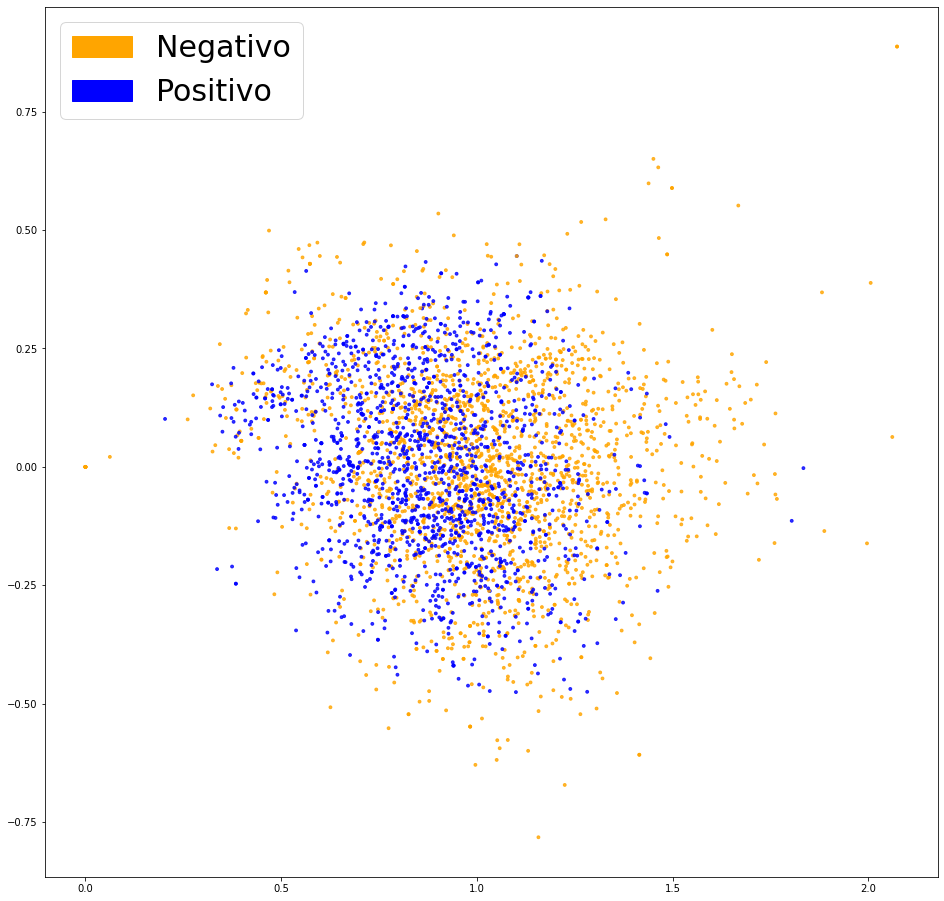

In [52]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

Visivelmente os vetores não estão mais tão separados quanto antes. Esse é um erro possível ao usar um modelo em inglês para treinar nosso dataset.

Mas vamos continuar observando.

Como regressão logística age neles?

In [53]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [54]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.911, precision = 0.911, recall = 0.911, f1 = 0.911


accuracy = 0.911, precision = 0.911, recall = 0.911, f1 = 0.911

As métricas também pioraram.

**Vamos visualizar a matriz confusão**

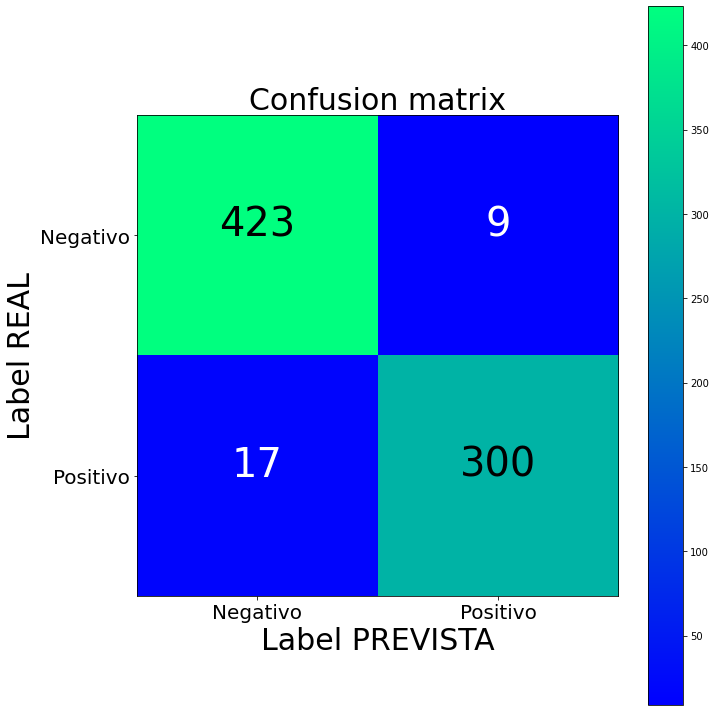

TFIDF confusion matrix
[[424   8]
 [ 17 300]]
BoW confusion matrix
[[423   9]
 [ 17 300]]
Word2Vec confusion matrix
[[399  33]
 [ 34 283]]


In [55]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Negativo','Positivo'], normalize=False, title='Confusion matrix')
plt.show()


print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)
print("Word2Vec confusion matrix")
print(cm_w2v)


Esse resultado deixa claro qual modelo agiu melhor sobre nossos dados.

TFIDF confusion matrix

[[424   8]

 [ 17 300]]

BoW confusion matrix

[[423   9]

 [ 17 300]]

Word2Vec confusion matrix

[[399  33]

 [ 34 283]]


 O melhor foi TFIDF 


 **Regressão Logística com TFIDF**

**Inspeção adicional**

Como nosso modelo não usa um vetor com uma dimensão por palavra, fica muito mais difícil ver diretamente quais palavras são mais relevantes para nossa classificação. A fim de fornecer alguma explicação, podemos aproveitar um explicador de caixa preta, como LIME

In [56]:
pip install lime

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=69ba1448ee5ff325d0ed43603af288d40563373cc59145516f75e67532067c4f
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [57]:
import lime
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [58]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word_vectors
def word_vectors_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word_vectors(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [59]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word_vectors_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["negativo","positivo"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [60]:
visualize_one_exp(X_test_data, y_test_data, 65)

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Index: 65
True class: negativo


In [61]:
visualize_one_exp(X_test_data, y_test_data, 60)

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Index: 60
True class: negativo


Como sabíamos, os resultados não foram bons.
É importante buscar um bom modelo de treino em língua portuguesa e refazer essas etapas.

In [62]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word_vectors_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word_vectors_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word_vectors_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Negativo',
    1: 'Positivo',
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word_vectors_pipeline, label_to_text)




/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]
/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]
/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]
/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]
/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]
/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a

In [63]:
sorted_contributions

{'Negativo': {'detractors': de       -0.033592
  e        -0.008067
  es       -0.005885
  em       -0.004757
  para     -0.004437
              ...   
  m         0.006179
  compra    0.006533
  que       0.009064
  minas     0.011841
  estado    0.105154
  Length: 149, dtype: float64, 'supporters': estado    0.105154
  minas     0.011841
  que       0.009064
  compra    0.006533
  m         0.006179
              ...   
  para     -0.004437
  em       -0.004757
  es       -0.005885
  e        -0.008067
  de       -0.033592
  Length: 149, dtype: float64}, 'Positivo': {'detractors': estado   -0.012536
  minas    -0.006801
  m        -0.005786
  que      -0.005276
  r        -0.004559
              ...   
  para      0.006929
  tr        0.011114
  drogas    0.013427
  cia       0.016263
  de        0.020037
  Length: 118, dtype: float64, 'supporters': de        0.020037
  cia       0.016263
  drogas    0.013427
  tr        0.011114
  para      0.006929
              ...   
  r        -

In [64]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negativo', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Palavra chave', fontsize=16)
    plt.xlabel('Importância', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positivo', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importância', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()



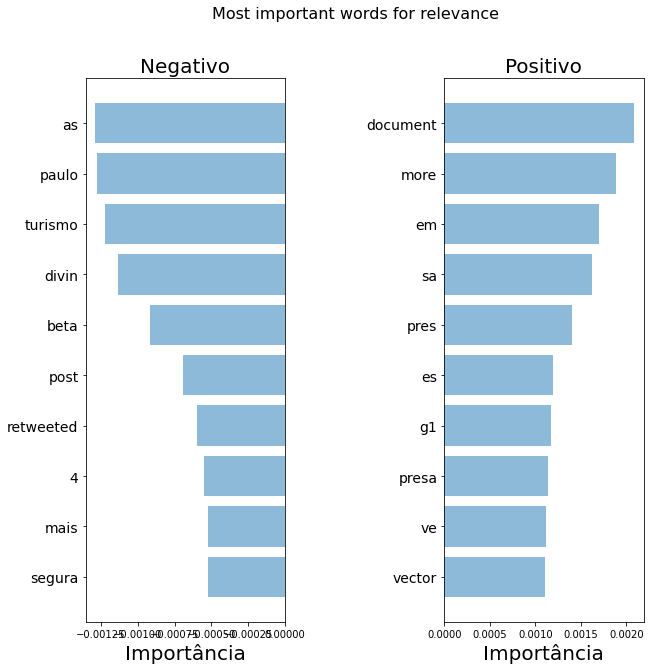

In [65]:
top_words = sorted_contributions['Positivo']['supporters'][20:30].index.tolist()
top_scores = sorted_contributions['Positivo']['supporters'][20:30].tolist()
bottom_words = sorted_contributions['Positivo']['detractors'][20:30].index.tolist()
bottom_scores = sorted_contributions['Positivo']['detractors'][20:30].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

O modelo não nos retornou informações relevantes, mas já era previsto devido ao modelo com que fora treinado ser em outro idioma.

Porém, é uma ferramente muito útil para essas análises.

**Considerações**

Aproveitando a estrutura de texto

Uma dica para ver se a captura de um pouco mais de senso de estrutura ajudaria, seria tentar um modelo final mais complexo:
**CNNs para classificação de texto**
Seria usado uma Rede Neural Convolucional para classificação de sentenças.

 Embora não sejam tão populares quanto os RNNs, eles comprovadamente obtêm resultados competitivos (às vezes superando os melhores modelos) e são muito rápidos de treinar.

O primeiro passo seria incorporar o texto, depois definir uma Rede Neural Convolucinal simples, utilizando bibliotera Keras. E, então, treinar a rede neural e ajustar o modelo. 

Fica a dica para quem quiser continuar essa análise por meio de redes neurais.

#**Notas Finais**


Uma rápida recapitulação da abordagem que usamos com sucesso:

1. Comece com um modelo rápido e simples

2. Explique suas previsões

3. Entenda o tipo de erros que ele está cometendo

4. Use esse conhecimento para informar sua próxima etapa, seja trabalhar em seus dados ou um modelo mais complexo.

5. Essas abordagens foram aplicadas a um caso de exemplo específico usando modelos adaptados para entender e aproveitar textos curtos, como tweets, mas as ideias são amplamente aplicáveis a uma variedade de problemas

#Obrigada!
#Maria Eduarda 